In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('day.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df.shape

(731, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dropping few variables as they do not contain any useful information.

In [7]:
df.drop(['casual', 'registered', 'dteday', 'instant'], axis=1, inplace=True)

In [8]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [9]:
continuous_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Missing Value Analysis

In [10]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no missing values in the dataset.

### Outlier Analysis

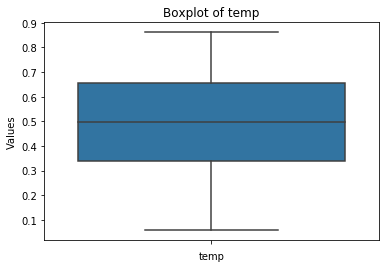

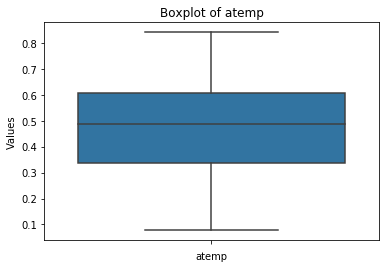

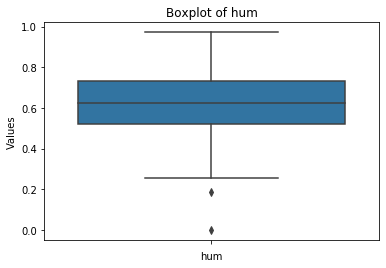

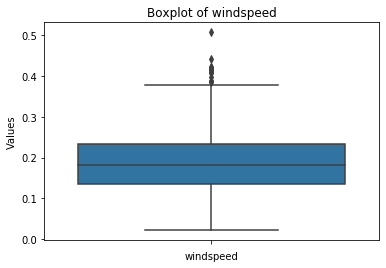

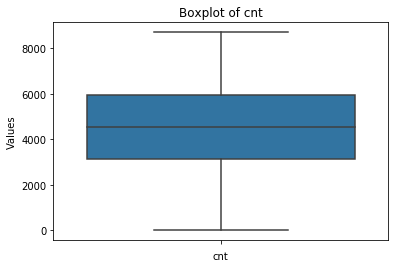

In [11]:
for column in continuous_columns:
    sns.boxplot(y=df[column])
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.title("Boxplot of " + column)
    plt.show()

We can see inliers in humidity and outliers in windspeed.

In [12]:
for column in continuous_columns:
    
    # Quartiles and IQR
    q25,q75 = np.percentile(df[column],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    Minimum = q25 - (1.5 * IQR)
    Maximum = q75 + (1.5 * IQR)
    
    df.loc[df[column] < Minimum ,column] = np.median(df[column])
    df.loc[df[column] > Maximum ,column] = np.median(df[column])

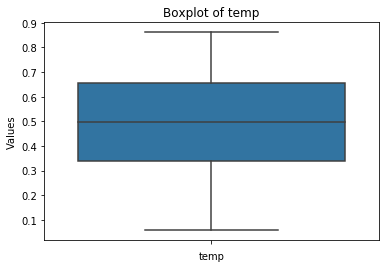

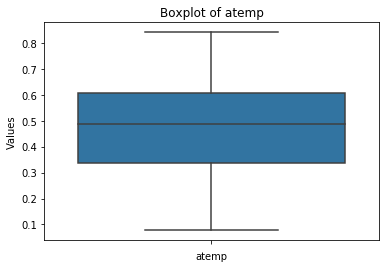

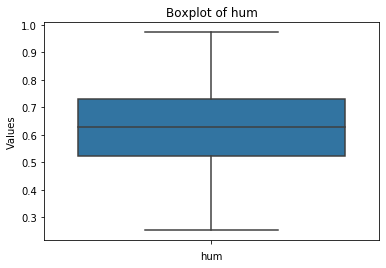

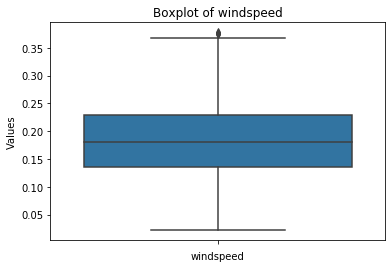

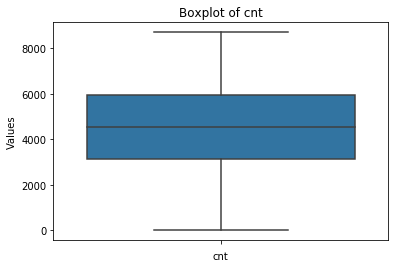

In [13]:
for column in continuous_columns:
    sns.boxplot(y=df[column])
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.title("Boxplot of " + column)
    plt.show()

## Visualization

### Univariate Analysis

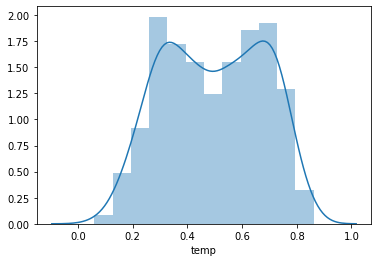

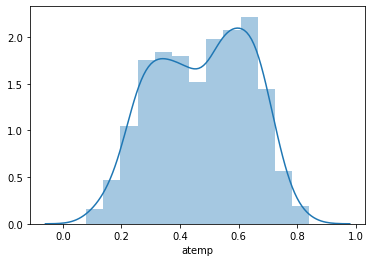

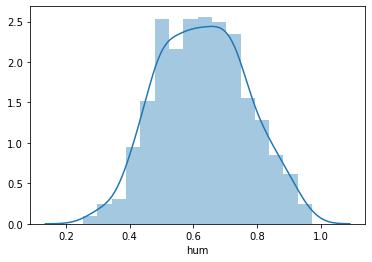

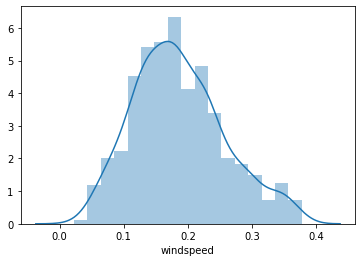

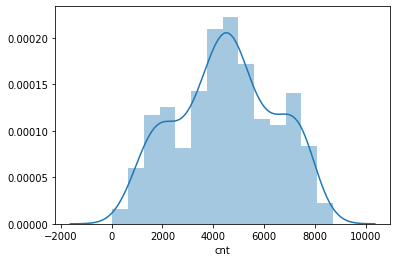

In [14]:
for column in continuous_columns:
    sns.distplot(df[column])
    plt.show()

### Bivariate Analysis

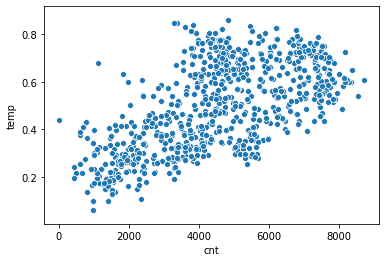

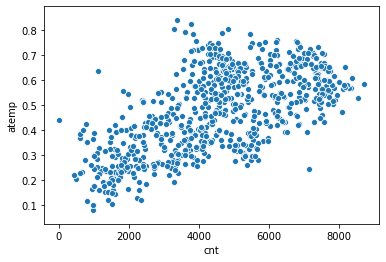

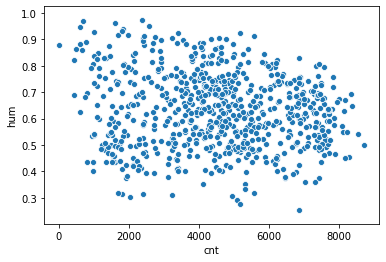

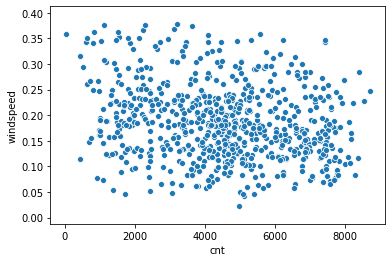

In [15]:
for column in continuous_columns[:-1]:
    sns.scatterplot(x='cnt', y=column, data=df)
    plt.show()

From above plots we can see that temperature(temp) and feels like temperature(atemp) are directly proportional to bike rental count. <br>
As temp or atemp variable increases cnt variable also increases. <br>
Humidity and windspeed do not impact bike count.

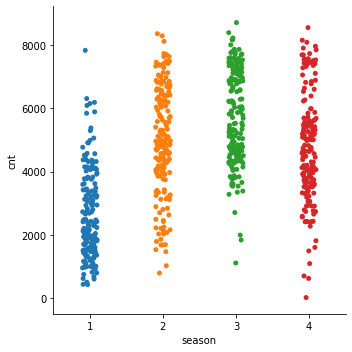

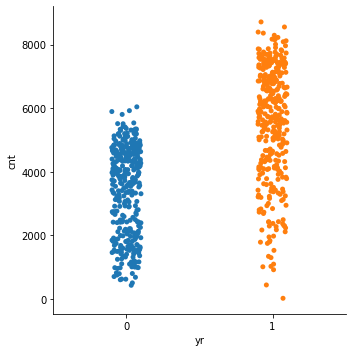

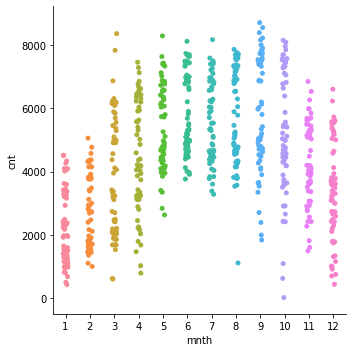

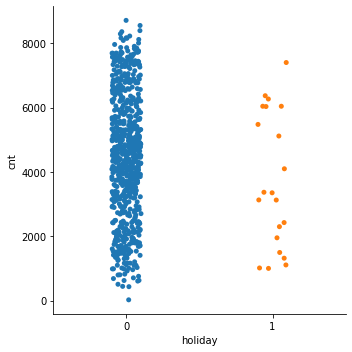

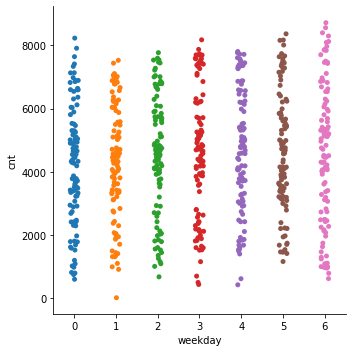

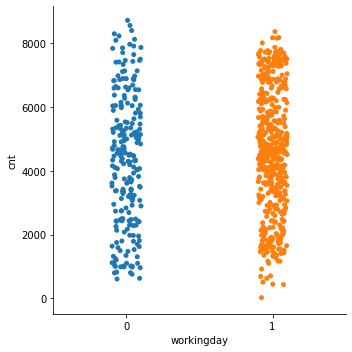

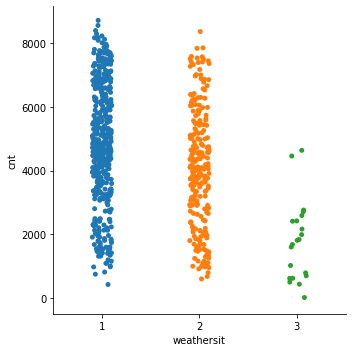

In [16]:
for column in categorical_columns:
    sns.catplot(x=column, y='cnt', data=df)
    plt.show()

Based on the plots,<br>
Bike rental count is high in season 3 which is fall and low in season 1 which is spring.<br>
Bike rental count is high in the year 1 which is 2012.<br>
Bike rental count is high in 8 which is in august and low in 1 which is in january.<br>
Bike rental count is high in 0 which is holiday and low in 1 which is working day.<br>
Bike rental count is high in 5 which is friday and low in 0 which is sunday.<br>
Bike rental count is high in 1 which is working day and low in 0 which is holiday.<br>
Bike rental count is higher in 1 which clear,few clouds,partly cloudy and there is no bikes rental in 4.<br>

## Feature Selection

For continuous values, we will be using correlation matrix.

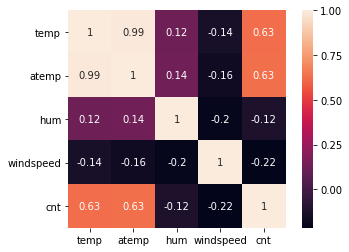

In [17]:
corr = df.loc[:,continuous_columns].corr()
sns.heatmap(corr, square=True, annot=True);

From the above plot, we can see temp and atemp are highly correlated to each other.<br>
Hence, we need to remove any one variable.<br>
We select 'atemp' to be dropped.

In [18]:
df.drop(['atemp'], axis=1, inplace=True)

For categorical variables, we will be doing ANOVA test.

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
for column in categorical_columns:
    mod = ols('cnt' + '~' + column, data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

<hr>According to ANOVA test, columns 'holiday','weekday','workingday' have p value greater than 0.05.<br>
Hence, dropping those variables as well.

In [21]:
df.drop(['holiday','weekday','workingday'], axis=1, inplace=True)

In [22]:
df.shape

(731, 8)

In [23]:
df.columns

Index(['season', 'yr', 'mnth', 'weathersit', 'temp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [24]:
continuous_columns = ['temp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'weathersit']

## Feature Scaling

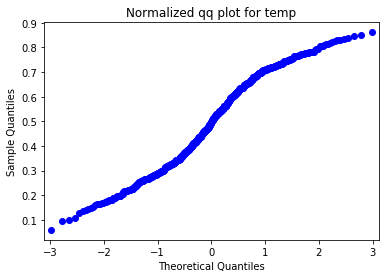

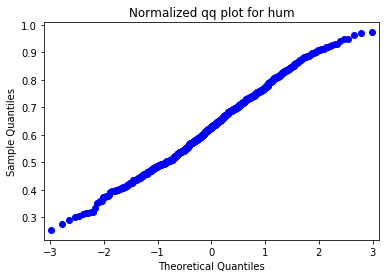

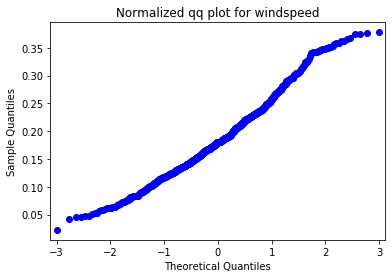

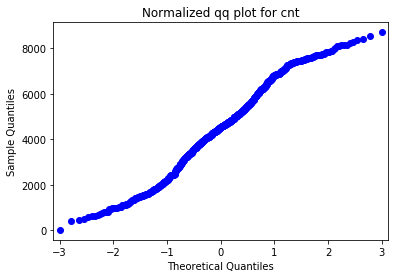

In [25]:
for column in continuous_columns:
    sm.qqplot(df[column])
    plt.title("Normalized qq plot for " + column)
    plt.show()

Based on the above plots, the data is normalized.

## Model Development

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

In [27]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred)/y_true)*100

### Linear Regression

In [30]:
linear_regression_model = LinearRegression()

In [31]:
linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = linear_regression_model.predict(X_test)

In [33]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.8164541158932392


In [34]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 857.9029023275841


In [35]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 152.7221531983817


### Decision Tree

In [36]:
decision_tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)

In [37]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [38]:
y_pred = decision_tree_model.predict(X_test)

In [39]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.8347100605785138


In [40]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 814.1211215582423


In [41]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 151.11484770173237


### Random Forest

In [42]:
random_forest_model = RandomForestRegressor(n_estimators=250, random_state=42)

In [43]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [44]:
y_pred = random_forest_model.predict(X_test)

In [45]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.8823685200057331


In [46]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 686.7957398010494


In [47]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 142.39063848933705


### Gradient Boosting

In [48]:
gradient_boosting_model = GradientBoostingRegressor(n_estimators=200, random_state=42, max_depth=4)

In [49]:
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
y_pred = gradient_boosting_model.predict(X_test)

In [51]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.9126760158287277


In [52]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 591.7422559670108


In [53]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 59.36088076224233


## Optimizing using Hyperparameter tuning:

### Randomized Search CV on Random Forest

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [55]:
rf_random = RandomizedSearchCV(estimator=random_forest_model, param_distributions=random_grid, 
                               n_iter=10, cv=3, random_state=42)

In [56]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=250,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [57]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [58]:
y_pred = rf_random.predict(X_test)

In [59]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.8870046796981472


In [60]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 673.1254961529941


In [61]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 127.95871839761934


### Randomized Search CV on Gradient Boosting

In [62]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
gb_random = RandomizedSearchCV(estimator=gradient_boosting_model, param_distributions=random_grid, 
                               n_iter=10, cv=3, random_state=42)

In [64]:
gb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [65]:
gb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 3}

In [66]:
y_pred = gb_random.predict(X_test)

In [67]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.9049781467824821


In [68]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 617.2733966771144


In [69]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 98.99325745059375


### Grid Search CV on Random Forest

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [71]:
rf_grid = GridSearchCV(estimator = random_forest_model, param_grid = param_grid, 
                          cv = 3)

In [72]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=250, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True], 'max_depth': [1

In [73]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [74]:
y_pred = rf_grid.predict(X_test)

In [75]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.8785435953949793


In [76]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 697.8723992684472


In [77]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 145.17704864890845


### Grid Search CV on Gradient Boosting

In [78]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [79]:
gb_grid = GridSearchCV(estimator = gradient_boosting_model, param_grid = param_grid, 
                          cv = 3)

In [80]:
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=4,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter...
                             

In [81]:
gb_grid.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [82]:
y_pred = gb_grid.predict(X_test)

In [83]:
print("R-square score:" ,r2_score(y_test, y_pred))

R-square score: 0.9095459846054651


In [84]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 602.2540612248299


In [85]:
print("MAPE:", MAPE(y_test, y_pred))

MAPE: 93.37159786271452


## Best Model Selection

From above results, we can see gradient boosting gives the best output.

In [86]:
y_test = y_test.reset_index()
y_pred = gradient_boosting_model.predict(X_test)
predictions = pd.DataFrame(y_pred, columns=['predicted'])
output = y_test.join(predictions)

,index,cnt,predicted
0,703,6606.0,6426.555227
1,33,1550.0,1429.288784
2,300,3747.0,3531.562216
3,456,6041.0,5240.952013
4,633,7538.0,7836.165356
5,557,7264.0,6958.938327
6,39,1605.0,947.275479
7,356,2209.0,973.231454
8,559,7499.0,7809.906319
9,514,5743.0,6385.286894


In [87]:
output.head()

,index,cnt,predicted
0,703,6606.0,6426.555227
1,33,1550.0,1429.288784
2,300,3747.0,3531.562216
3,456,6041.0,5240.952013
4,633,7538.0,7836.165356


In [88]:
output.to_csv("predictions.csv")